Ο κώδικας κατασκευάζει ενα γράφημα βασισμένο στις μέσες τιμές της κλίμακας Ρίχτερ ανα χρόνο απο το 1965 μέχρι το 2021.
 


In [56]:
#Adding libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


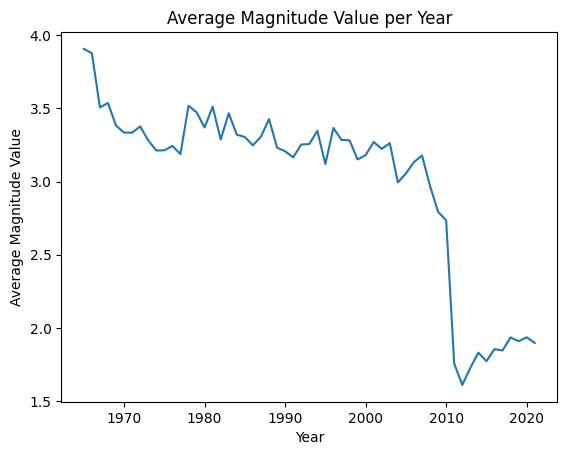

In [53]:
# DONE
def plot_avg_magnitude_by_year(data_filepath: str):
  # Load the data from the CSV file
  data = pd.read_csv(data_filepath)

  # Convert the datetime values to datetime objects
  data["DATETIME"] = pd.to_datetime(data["DATETIME"],format="%m/%d/%Y %H:%M")
  #grouping them by year
  grouped=data.groupby(data.DATETIME.dt.year)['MAGNITUDE'].mean()
  
  plt.plot(grouped)

  # Add a title and axis labels to the plot
  plt.title("Average Magnitude Value per Year")
  plt.xlabel("Year")
  plt.ylabel("Average Magnitude Value")

  # Show the plot
  plt.show()
    

plot_avg_magnitude_by_year('earthquake_data.csv')


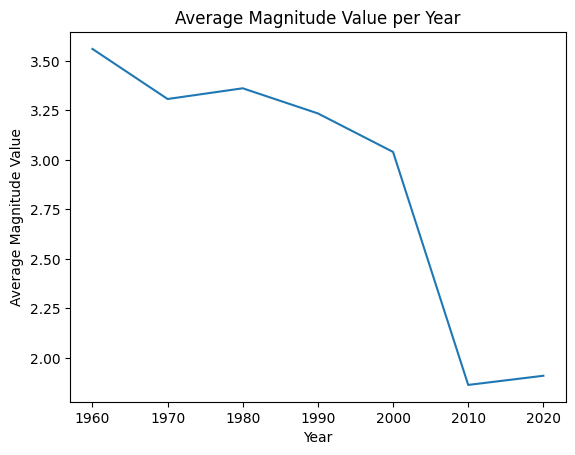

In [54]:
#DONE
def plot_avg_magnitude_by_decade(data_filepath: str):
  # Load the data from the CSV file
  data = pd.read_csv(data_filepath)

  timestamp=[]
  # Get the date and time from the first row of the 'DATETIME' column

  for i in range(len(data['DATETIME'])):
    date_time = data['DATETIME'][i]

    # Split the date and time into separate parts
    date, time = date_time.split(" ")

    # Split the date into its component parts
    day, month, year = date.split("/")

    # Split the time into its component parts
    # hour, minute = time.split(":")

    # Create a tuple with the date and time parts
    result = str((int(year)//10))+'0'

    # Convert the date and time tuple to Unix time
    timestamp.append(result)
  timeStamp=pd.Series(timestamp)
  data.drop('DATETIME',axis=1)
  data['TIME']= timeStamp.values
  data["TIME"] = pd.to_datetime(data["TIME"],format="%Y")
  grouped=data.groupby(data.TIME.dt.year)['MAGNITUDE'].mean()

  plt.plot(grouped)

  # Add a title and axis labels to the plot
  plt.title("Average Magnitude Value per Year")
  plt.xlabel("Year")
  plt.ylabel("Average Magnitude Value")

  # Show the plot
  plt.show()
    

plot_avg_magnitude_by_decade('earthquake_data.csv')


In [55]:
#DONE

def top_seismogenic_places(file_path,num_places):

  data = pd.read_csv(file_path)

  clean_data=data.drop(columns=["DATETIME","DEPTH","MAGNITUDE"])
  grouped=clean_data.groupby(["LAT","LONG"])
  top_5=grouped.size().nlargest(num_places)
  return top_5


#example usage
top_5_seismogenic_places = top_seismogenic_places('earthquake_data.csv', 5)

#to get geo info from longtitude and latitude, use a geocoding library like geopy

#create geolocator object
geolocator = Nominatim(user_agent="erathquake")


#for each latitude and longitude pair in top_5_seismogenic_places, get the address
for lat, longt in top_5_seismogenic_places.index:
  location = geolocator.reverse("{}, {}".format(lat, longt))
  print(location.address)

κ. Τέμενης, Τέμενη, Δημοτική Ενότητα Αιγίου, Δήμος Αιγιαλείας, Περιφερειακή Ενότητα Αχαΐας, Περιφέρεια Δυτικής Ελλάδας, Αποκεντρωμένη Διοίκηση Πελοποννήσου, Δυτικής Ελλάδας και Ιονίου, 251 00, Ελλάς
Κορίνθου, Εργατικές Κατοικίες (Αγίου Αθανασίου), Άγιος Αθανάσιος, κ. Αιγίου, Δημοτική Ενότητα Αιγίου, Δήμος Αιγιαλείας, Περιφερειακή Ενότητα Αχαΐας, Περιφέρεια Δυτικής Ελλάδας, Αποκεντρωμένη Διοίκηση Πελοποννήσου, Δυτικής Ελλάδας και Ιονίου, 251 00, Ελλάς
Συνοικισμός, κ. Αιγίου, Δημοτική Ενότητα Αιγίου, Δήμος Αιγιαλείας, Περιφερειακή Ενότητα Αχαΐας, Περιφέρεια Δυτικής Ελλάδας, Αποκεντρωμένη Διοίκηση Πελοποννήσου, Δυτικής Ελλάδας και Ιονίου, Ελλάς
Σουτραλί, Δήμος Βόλου, Περιφερειακή Ενότητα Μαγνησίας, Περιφέρεια Θεσσαλίας, Αποκεντρωμένη Διοίκηση Θεσσαλίας - Στερεάς Ελλάδος, 385 00, Ελλάς
Εργατικές Κατοικίες (Αγίου Αθανασίου), Άγιος Αθανάσιος, κ. Αιγίου, Δημοτική Ενότητα Αιγίου, Δήμος Αιγιαλείας, Περιφερειακή Ενότητα Αχαΐας, Περιφέρεια Δυτικής Ελλάδας, Αποκεντρωμένη Διοίκηση Πελοποννήσου, Δυτ

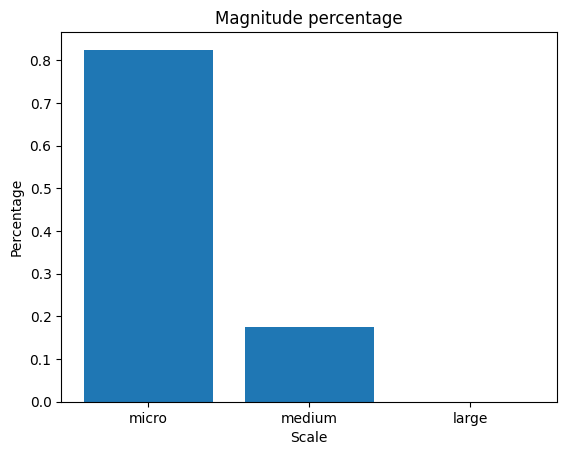

In [57]:
def plot_magnitude_data(file_path):
  
  data=pd.read_csv(file_path)
  clean_data=data.drop(columns=["DATETIME","LAT","LONG","DEPTH"])
  

  clean_data["magnitude_group"]=pd.cut(clean_data['MAGNITUDE'],bins=[0,3,6,8],labels=["micro","medium","large"])
  vals=clean_data["magnitude_group"].value_counts(normalize=True)
  

  plt.bar(vals.index, vals.values)

  # Add a title and axis labels to the plot
  plt.title("Magnitude percentage")
  plt.xlabel("Scale")
  plt.ylabel("Percentage")

  # Show the plot
  plt.show()
  
  
plot_magnitude_data('earthquake_data.csv')


In [59]:
#DONE
# Load the dataset into a pandas DataFrame
df = pd.read_csv('earthquake_data.csv')

# Convert the DATETIME column to a datetime data type
df['DATETIME'] = pd.to_datetime(df['DATETIME'])

# Set the index of the DataFrame to the DATETIME column
df.set_index('DATETIME', inplace=True)

# Select the features to use for prediction
X = df[['LAT', 'LONG', 'DEPTH', 'MAGNITUDE']]

# Select the target variable
y = df['MAGNITUDE']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest model on the training data
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean absolute error of the predictions
mae = mean_absolute_error(y_test, y_pred)

# Print the mean absolute error
print(mae)


2.726205451125038e-06


MAKING PREDECTIONS

In [20]:
#CLEANING DATA
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv('earthquake_data.csv')

# Convert the DATETIME column to a datetime data type
df['DATETIME'] = pd.to_datetime(df['DATETIME'])

# Set the index of the DataFrame to the DATETIME column
df.set_index('DATETIME', inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

# Remove outliers
df = df[df['MAGNITUDE'] > 0]

# Normalize the data
df = (df - df.mean()) / df.std()

# Save the cleaned data to a new file
df.to_csv('cleaned_data.csv', index=False)


In [21]:
#SPLITTING DATA
from sklearn.model_selection import train_test_split

# Load the cleaned data into a pandas DataFrame
df = pd.read_csv('cleaned_data.csv')


# Select the features to use for prediction
X = df[['LAT', 'LONG', 'DEPTH', 'MAGNITUDE']]

# Select the target variable
y = df['MAGNITUDE']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [31]:
#TRAINING A MODEL
# Train a random forest model on the training data
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# Make predictions on the test data
test_predictions = model.predict(X_test)

# Calculate the MAE
mae = mean_absolute_error(y_test, test_predictions)
mse=mean_squared_error(y_test,test_predictions)
r2=r2_score(y_test,test_predictions)


# Print the MAE
print("Mean Absolute Error:",mae)
print("Mean Squared Error:",mse)
print("R2 Score:",r2)


Mean Absolute Error: 3.262392848098775e-06
Mean Squared Error: 1.5691958377342232e-07
R2 Score: 0.9999998411706186


In [50]:
#Testing a model
future_data = pd.DataFrame({
    'LAT': [35.0, -5.0, 10.0],
    'LONG': [135.0, 160.0, 15.0],
    'DEPTH': [10.0, 20.0, 30.0],
    'MAGNITUDE': [7.0, 5.0, 6.0]
})
predictions = model.predict(future_data)

# Print the predictions
print("LAT |", "LONG |", "MAGNITUDE |")
for i in range(len(future_data)):
    print(future_data['LAT'][i],future_data["LONG"][i], predictions[i])


LAT | LONG | MAGNITUDE |
35.0 135.0 5.371350841364862
-5.0 160.0 5.021601451023503
10.0 15.0 5.371350841364862
